## Physical implementation of a qubit device

In [1]:
%matplotlib inline
import numpy as np

from qutip import *
from qutip.qip.device import *
from qutip.qip.operations import rx, gate_sequence_product
from qutip.qip.circuit import QubitCircuit
from qutip.qip.circuit_latex import _latex_compile

%load_ext autoreload
%autoreload 2

### Circuit Setup

In [2]:
# Number of qubits in the system
N = 2

# Input state
input_states = ["0"]*N

# A list of integers for the dimension of each composite system.
dims = [2]*N

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, -np.pi/2, r"-\pi/2")

In [3]:
U_ideal = gate_sequence_product(qc.propagators())

U_ideal

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        +0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        +0.70710678j]
 [0.        +0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

### Processor
A simulator of a quantum device based on the QuTiP solver
:func:`qutip.mesolve`.
It is defined by the available driving Hamiltonian and
the decoherence time for each component systems.
The processor can simulate the evolution under the given
control pulses. Noisy evolution is supported by
:class:`qutip.qip.Noise` and can be added to the processor.

In [4]:
p1 = CircularSpinChain(N, correct_global_phase=True)

U_list = p1.run(qc)

U_physical = gate_sequence_product(U_list)

U_physical.tidyup(atol=1e-5)

asd
[1.5707963267948966, 1.5707963267948966]
[0.6283185307179586, 0.6283185307179586]
[<qutip.qip.pulse.Pulse object at 0x7fdf0883a610>, <qutip.qip.pulse.Pulse object at 0x7fdf4810dfd0>, <qutip.qip.pulse.Pulse object at 0x7fdf4810d1f0>, <qutip.qip.pulse.Pulse object at 0x7fdf310dd040>, <qutip.qip.pulse.Pulse object at 0x7fdf310dd250>]
[0.  0.5]
[array([-1.57079633]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.])]


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.70710678+0.j         0.        +0.j         0.        +0.70710678j
  0.        +0.j        ]
 [0.        +0.j         0.70710678+0.j         0.        +0.j
  0.        +0.70710678j]
 [0.        +0.70710678j 0.        +0.j         0.70710678+0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.70710678j 0.        +0.j
  0.70710678+0.j        ]]

In [5]:
p1.qc0.gates

[Gate(RX, targets=[0], controls=None)]

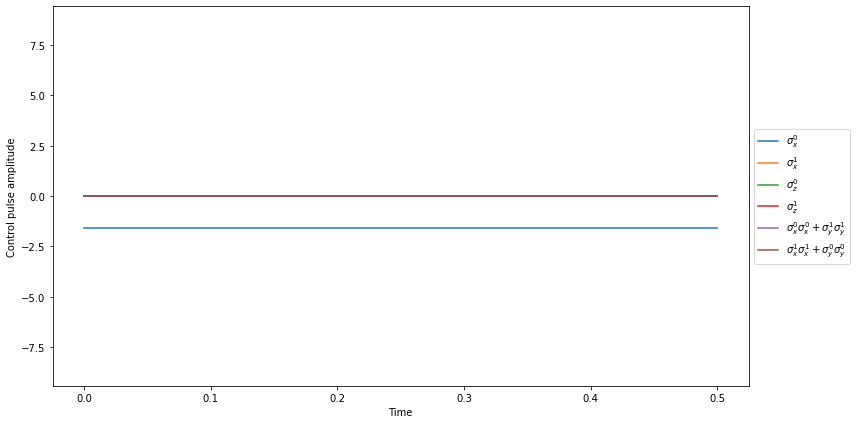

In [6]:
p1.plot_pulses();

In [7]:
p1.load_circuit(qc);

[0.  0.5]
[array([-1.57079633]), array([0.]), array([0.]), array([0.]), array([0.]), array([0.])]


In [53]:
import qutip.ipynbtools
qutip.ipynbtools.version_table()

Software,Version
QuTiP,4.5.0.dev0+01132789
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.2.0
Cython,0.29.15
Number of CPUs,6
BLAS Info,Generic
IPython,7.13.0
Python,"3.8.2 | packaged by conda-forge | (default, Mar 5 2020, 16:54:44) [Clang 9.0.1 ]"
OS,posix [darwin]
